In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
rng = np.random.RandomState(42)

In [4]:
X_inliers = 0.3 * rng.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [5]:
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [6]:
X = np.r_[X_inliers, X_outliers]

In [7]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)  # -1 = outlier, 1 = inlier
scores = -clf.negative_outlier_factor_  # Higher score = more abnormal

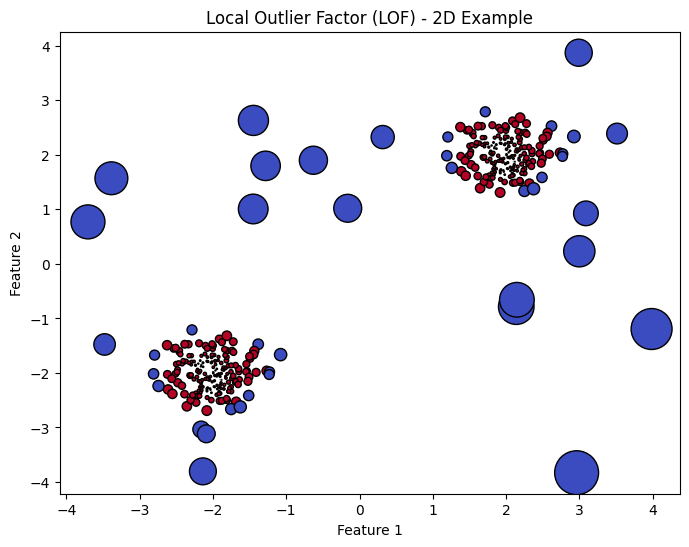

In [8]:
# Plotting
plt.figure(figsize=(8, 6))
# Use point size to reflect the outlier score
sizes = 1000 * (scores - scores.min()) / (scores.max() - scores.min())

# Blue for inliers, red for outliers
plt.scatter(X[:, 0], X[:, 1], c=(y_pred == 1), cmap='coolwarm', s=sizes, edgecolor='k')
plt.title("Local Outlier Factor (LOF) - 2D Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()